# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="docs/images/election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [71]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [72]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("./dataset/Portugal_Election_Data.csv")

In [73]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [4]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


In [5]:
# Print first 2 rows
ucdata.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77


In [6]:
# Print last 2 rows
ucdata.tail(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647.0,4235,2.22,3632,1.9,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647.0,4235,2.22,3632,1.9,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [7]:
ucdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21629 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21636 non-null  float64
 14  pre.bl

#### **Findings:**
>From the info function it can be observed that out of 28 columns 3 columns are categorical. Null values are present in some columns. Dataset takes 
    approx: 5MB of storage.

***
### <div align="center"> Exploratory Data Analysis</div>
***

<div class="alert alert-warning"><b>Note :: </b>This dataset is analysed by splitting among 5 members of the group. Each set of columns are numbered based on the order of analysis conducted by corresponding member.</div> 

In [69]:
colset1 = ['TimeElapsed','time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes'] # Sreehari P S
colset2 = ['numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage'] # Sruthy Surendran
colset3 = ['subscribedVoters','totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes','pre.nullVotesPercentage'] # Heleena Joy
colset4 = ['pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage'] # Gopikrishna Shyam Kumar
colset5 = ['validVotesPercentage','Votes', 'Hondt', 'FinalMandates'] # Jebitta Joseph

In [9]:
# Describe
ucdata.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TimeElapsed,21643.0,133.15,77.65,0.00,65.00,135.00,200.00,265.00
totalMandates,21643.0,11.54,31.31,0.00,1.00,4.00,9.00,226.00
availableMandates,21643.0,11.50,31.74,0.00,0.00,3.00,9.00,226.00
numParishes,21643.0,309.96,659.06,54.00,75.00,147.00,242.00,3092.00
numParishesApproved,21643.0,261.09,583.38,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.07,21484.87,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21629.0,2.62,0.80,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.07,14735.47,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.96,0.38,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.98,4.85,35.98,50.29,53.13,54.55,59.87


<div class="alert alert-success"><b>1. Check for Unique values</b></div>

In [79]:
def check_unique_values(columns):
    print(f'Unique values :: \n{ucdata[columns].nunique()}')

In [80]:
# Column set 1
check_unique_values(colset1)

Unique values :: 
TimeElapsed          54
time                 54
territoryName        21
totalMandates        62
availableMandates    69
numParishes          20
dtype: int64


In [81]:
# Column set 2
check_unique_values(colset2)

Unique values :: 
numParishesApproved     219
blankVotes              329
blankVotesPercentage    146
nullVotes               331
nullVotesPercentage     107
votersPercentage        282
dtype: int64


In [13]:
# Column set 3
check_unique_values(colset3)

Unique values :: 
subscribedVoters            335
totalVoters                 336
pre.blankVotes              323
pre.blankVotesPercentage    130
pre.nullVotes               329
pre.nullVotesPercentage      90
dtype: int64


In [14]:
# Column set 4
check_unique_values(colset4)

Unique values :: 
pre.votersPercentage     278
pre.subscribedVoters     331
pre.totalVoters          331
Party                     21
Mandates                  67
Percentage              1363
dtype: int64


In [15]:
# Column set 5
check_unique_values(colset5)

Unique values :: 
validVotesPercentage    1387
Votes                   4029
Hondt                     41
FinalMandates             17
dtype: int64


<div class="alert alert-success"><b>2. Check for Null values</b></div>

In [16]:
# Column set 1
ucdata[colset1].isna().sum()

TimeElapsed          0
time                 0
territoryName        0
totalMandates        0
availableMandates    0
numParishes          0
dtype: int64

#### **Findings:**
>No null values are present in the 1st set of columns. Since the 2 columns "time" and "territoryName" are of type object, we need to check for special
    characters that may present in them.

In [17]:
# Column set 2
ucdata[colset2].isna().sum()

numParishesApproved      0
blankVotes               0
blankVotesPercentage    14
nullVotes                0
nullVotesPercentage      0
votersPercentage         0
dtype: int64

#### **Findings:**
>There are 14 null values present in the 'blank voters percentage' column. Since it is percentage value it can be calulated from "blankVotes".

In [18]:
# Column set 3
ucdata[colset3].isna().sum()

subscribedVoters             0
totalVoters                  7
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage     12
dtype: int64

#### **Findings:**
>The columns "totalVoters and pre.nullVotesPercentage" are having null values. So we have to fill these missing values.
>1. "pre.nullVotesPercentage" can be calculated from "pre.nullVotes" and "totalVoters"
2. "totalVoters" from "subscribedVoters and votersPercentage".

In [19]:
# Column set 4
ucdata[colset4].isna().sum()

pre.votersPercentage    0
pre.subscribedVoters    0
pre.totalVoters         0
Party                   0
Mandates                0
Percentage              0
dtype: int64

#### **Findings:**
>No null values are present in the 4th set of columns. Since column "Party" is of type object, we need to check for special characters that may present in it.

In [20]:
# Column set 5
ucdata[colset5].isna().sum()

validVotesPercentage    0
Votes                   0
Hondt                   0
FinalMandates           0
dtype: int64

#### **Findings:**
>No null values are present in the 5th set of columns.

<div class="alert alert-success"><b>3. Check for special characters</b></div>

From the info function it is clear that 3 columns ['time', 'territoryName', 'Party'] are of type "Object". It is thus vital to check for any special characters that may contain in them. This helps to avoid ambuguity and effective use of variables.

In [82]:
validTimeFormat = ":-" + string.whitespace + string.digits
col = 'time'
print(f'Any special characters present in "{col}"? --> {ucdata[col].str.strip(validTimeFormat).astype(bool).any()}')

Any special characters present in "time"? --> False


#### **Findings:**
>Time does not have any special characters apart from : and - , which represent time params. 

In [86]:
portuguese_chars = 'áéíóúçâêôãõàèìòùÁÉÍÓÚÇÂÊÔÃÕÀÈÌÒÙ'
valid_nameformat = string.whitespace + string.ascii_letters + '/.-' + portuguese_chars
col = 'territoryName'
print(f'Any special characters present in {col}? --> {ucdata[col].str.strip(valid_nameformat).astype(bool).any()}')

Any special characters present in territoryName? --> False


#### **Findings:**
>No Special characters present for column "territoryName".

In [23]:
col = 'Party'
print(f'Any special characters present in {col}? --> {ucdata[col].str.strip(valid_nameformat).astype(bool).any()}')

Any special characters present in Party? --> False


#### **Findings:**
>No Special characters present for column "Party".

<div class="alert alert-success"><b>4. Check for duplicate rows</b></div>

In [24]:
ucdata[ucdata.duplicated()]

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates


#### **Findings:**
>No duplicate rows are present in the dataset 

<div class="alert alert-success"><b>5. Univariate Analysis</b></div>

In [25]:
# Columns set 1
print(colset1)

['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes']


#### **Observation:**
>Both TimeElapsed and time are time-components for the dataset. They span 4hr 25mins. So no further inference can be made from these columns

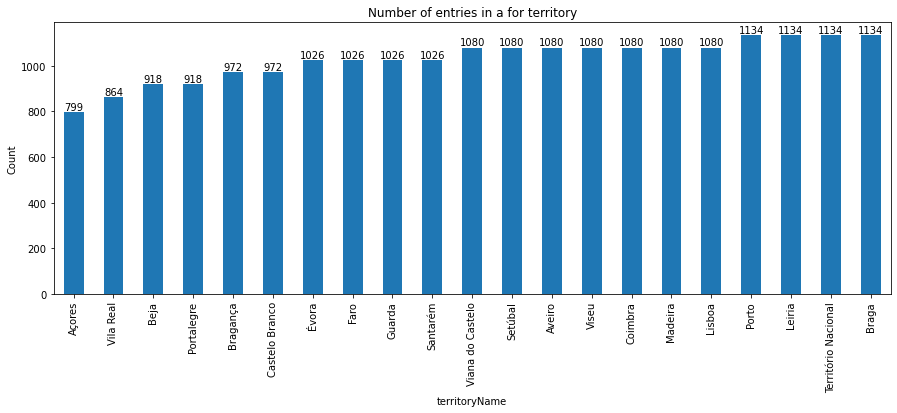

In [26]:
# territoryName analysis
plt.figure(figsize=(15,5))
ax = ucdata.groupby('territoryName').size().sort_values().plot(kind = 'bar', ylabel = 'Count', title = "Number of entries in a for territory")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>Above graph shows the count of data for 20 district along with whole nation ('Território Nacional'). Count of values present for each district are different.</br>There are 2 factors contributing to this difference, 1. Number of Parties and 2. Number of intervals for which data arrived.

In [27]:
def create_boxkde(column):
    fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.boxplot(x = column, data = ucdata, ax=a1, color = 'r')
    a1.set_title('Box plot for ' + column)
    sns.distplot(ucdata[column], ax=a2)
    a2.set_title('Distribution of ' + column)
    plt.show()

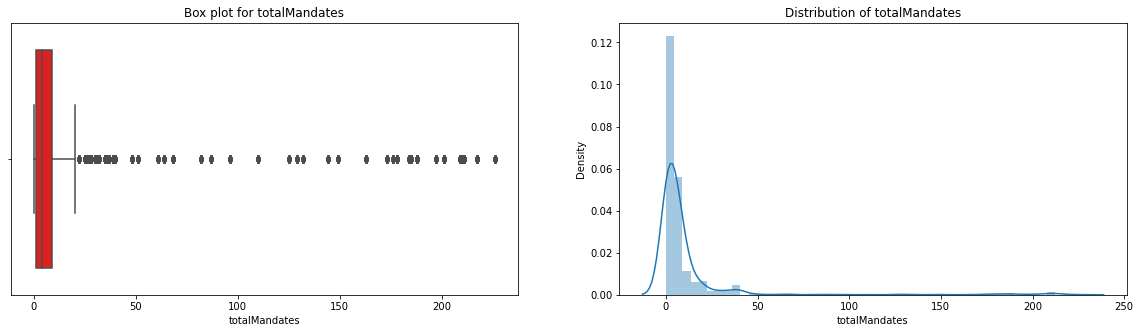

In [28]:
create_boxkde('totalMandates')

#### **Findings:**
>1. TotalMandates represent 'No of MPs elected at that point of time'. So it is a dynamic variable. It increases for each district as time passses.
2. The "outliers" shown in box plot can be ignored as they represent a valid value in a particular time frame. 
3. From the distribution it is clear that for most time-period in dataset "totalMandates" equals "zero". This is a valid case as we know in election, count of elected members only increase towards end of counting.

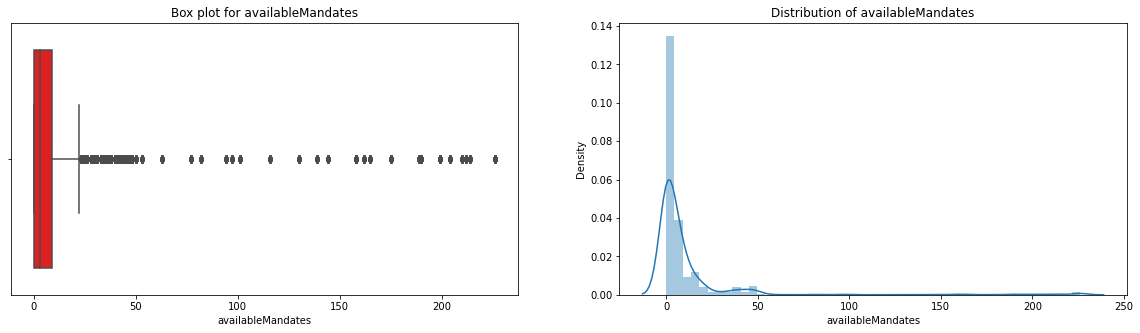

In [29]:
create_boxkde('availableMandates')

#### **Findings:**
>1. AvailableMandates represent 'No of MPs left to be elected at that point of time'.
2. This is negation for "totalMandates". Values and their distribution follows same behaviuor as that of "totalMandated", but in reverse order.

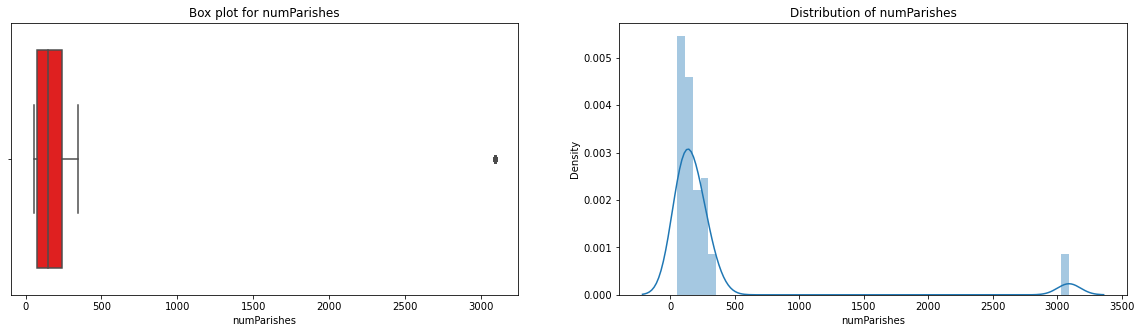

In [30]:
create_boxkde('numParishes')

#### **Findings:**
>1. NumParishes represents 'Total number of parishes in a location'. 
2. From the boxplot it is clear that one value is way too large. 
3. This value is "the count for entire portugal nation" i.e. "Território Nacional". It is sum of all district values.
4. From distribution it is clear that each district has parish count between 0 to 500.

In [31]:
# Columns set 2
print(colset2)

['numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage']


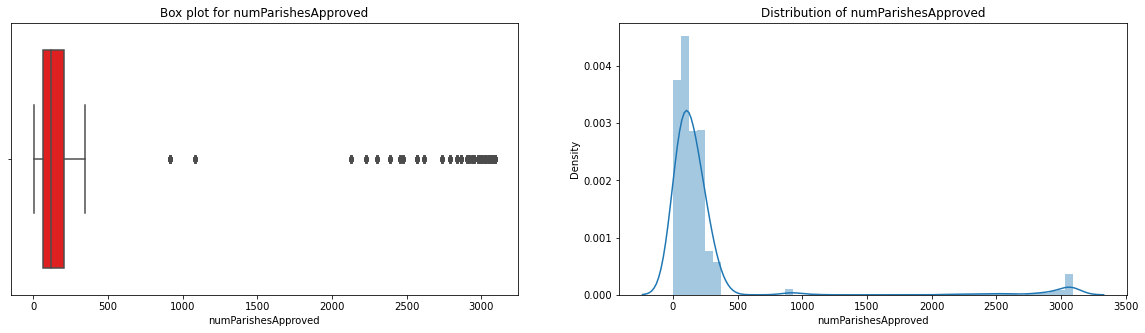

In [32]:
create_boxkde('numParishesApproved')

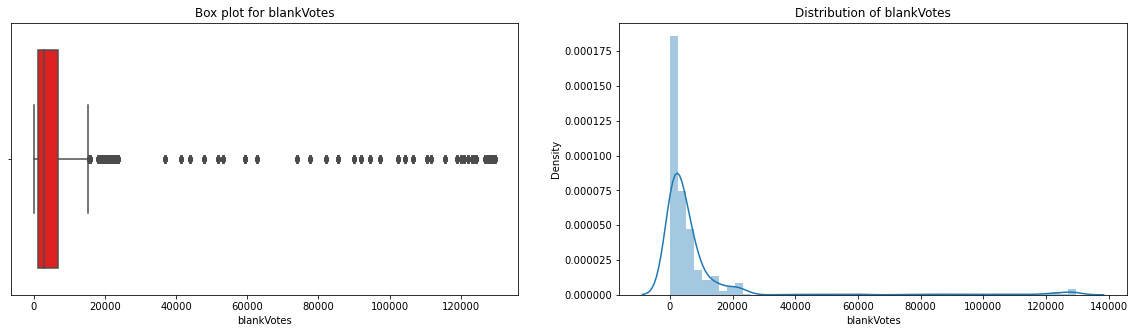

In [33]:
create_boxkde('blankVotes')

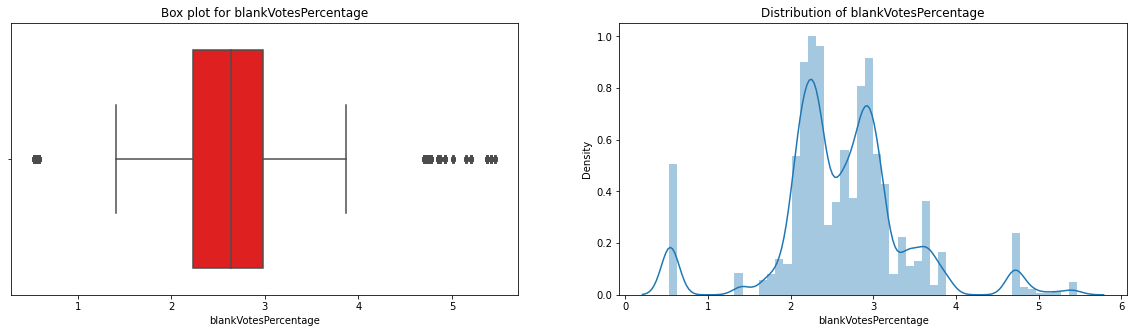

In [34]:
create_boxkde('blankVotesPercentage')

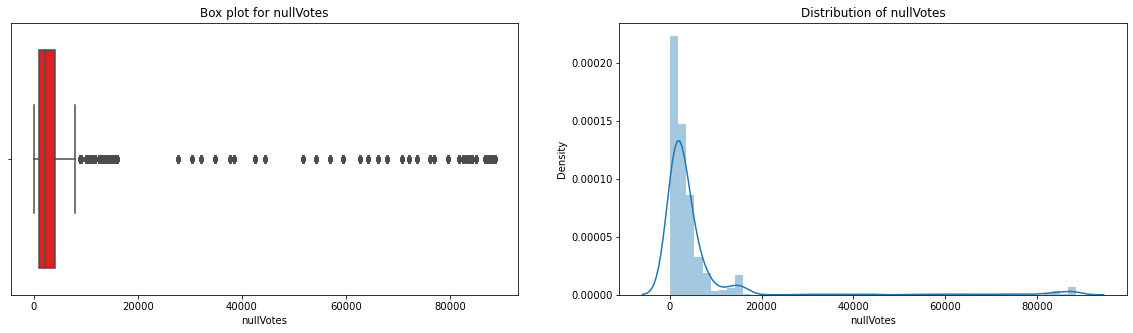

In [35]:
create_boxkde('nullVotes')

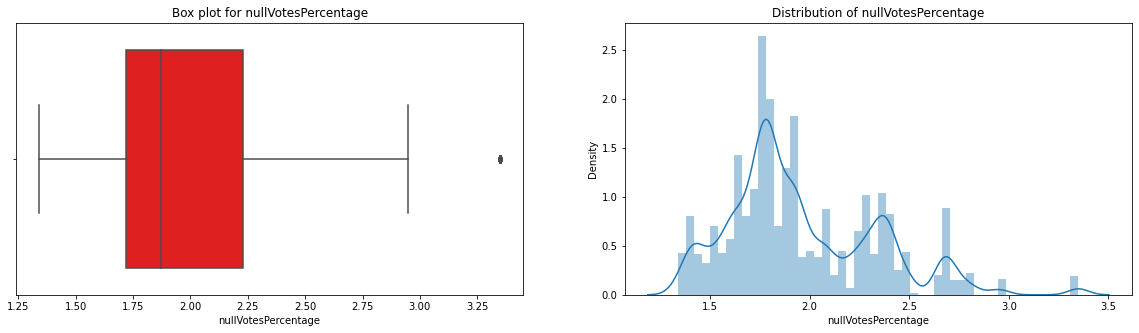

In [36]:
create_boxkde('nullVotesPercentage')

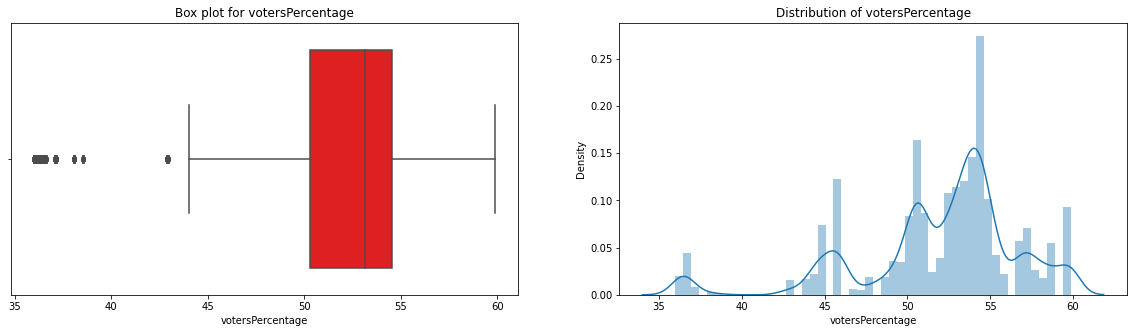

In [37]:
create_boxkde('votersPercentage')

#### **Findings:**
>1. 'numParishesApproved','blankVotes', 'nullVotes' and 'null votes percentage' are skewed towards left
2. 'votersPercentage' is skewed towards right
3. 'blankVotesPercentage', 'nullVotesPercentage' and 'votersPercentage', are Multimodal distributions.
4. Outliers can be seen, but they maynot be troublesome data represent various regions in portugal.

In [38]:
# Columns set 3
print(colset3)

['subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage']


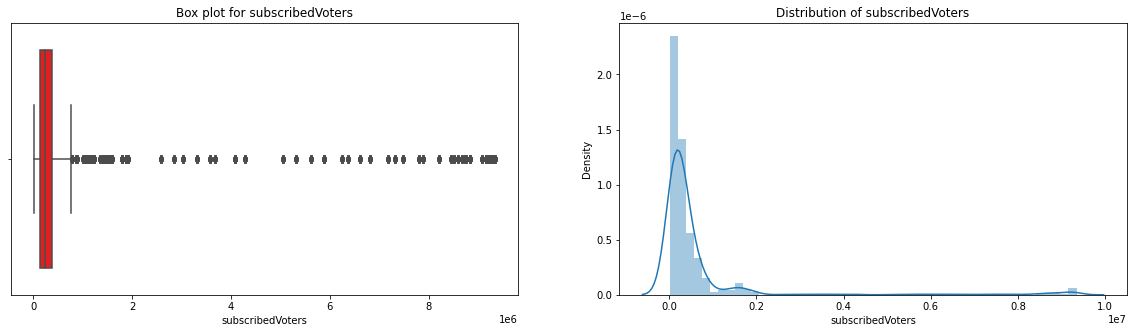

In [39]:
create_boxkde('subscribedVoters')

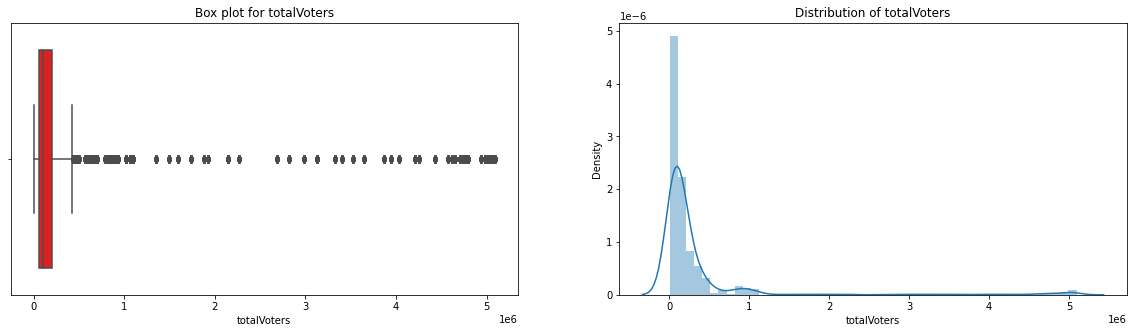

In [40]:
create_boxkde('totalVoters')

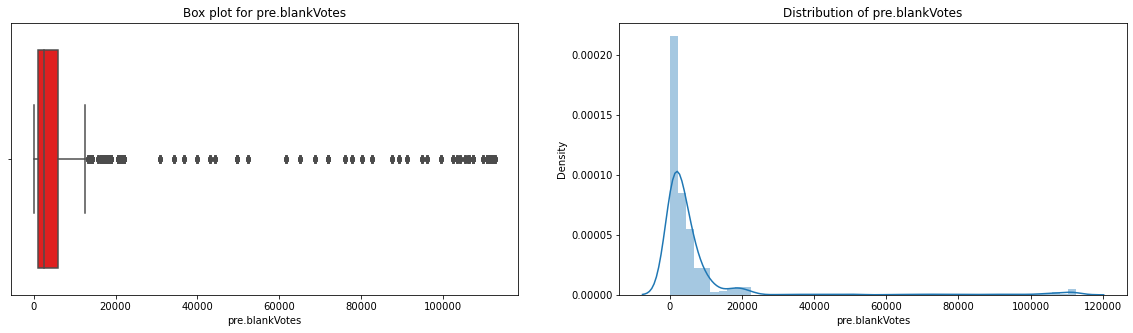

In [41]:
create_boxkde('pre.blankVotes')

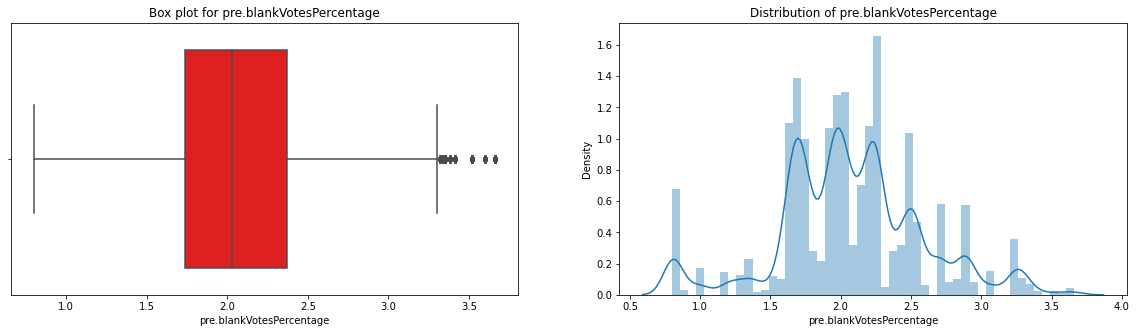

In [42]:
create_boxkde('pre.blankVotesPercentage')

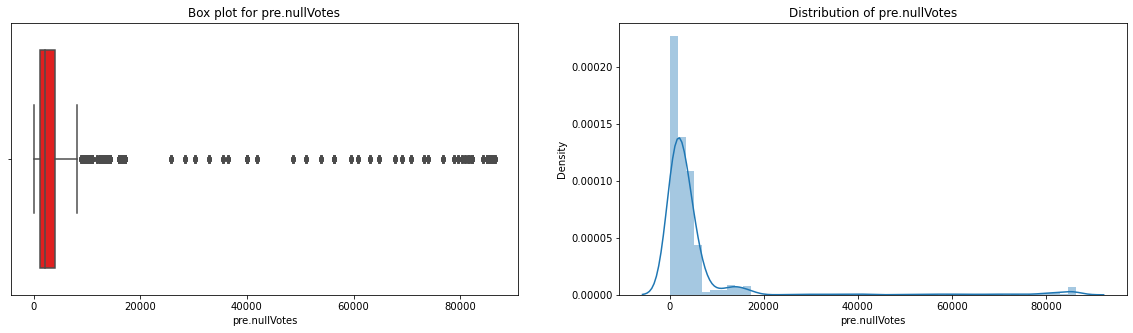

In [43]:
create_boxkde('pre.nullVotes')

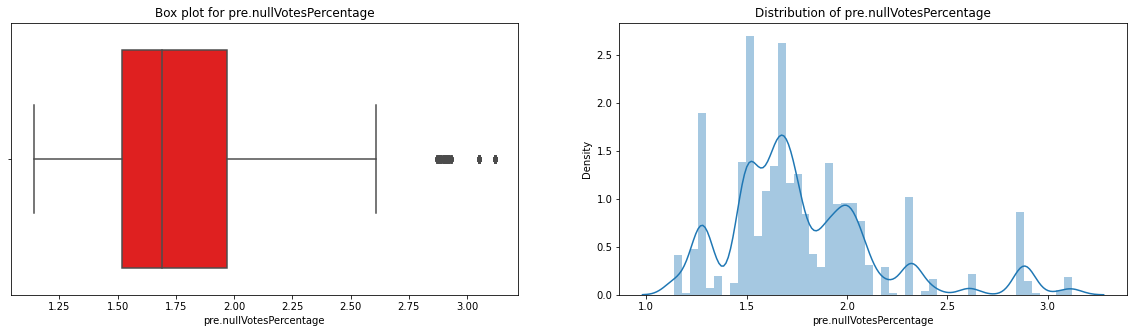

In [44]:
create_boxkde('pre.nullVotesPercentage')

#### **Findings:**
>We can find outliers for columns:                                                                                              
>1. subscribedVoters                                                                                                             
2. totalVoters                 
3. pre.blankVotes              
4. pre.blankVotesPercentage    
5. pre.nullVotes               
6. pre.nullVotesPercentage     
These outliers can be ignored due to geographic and political variations.

In [45]:
# Columns set 4
print(colset4)

['pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage']


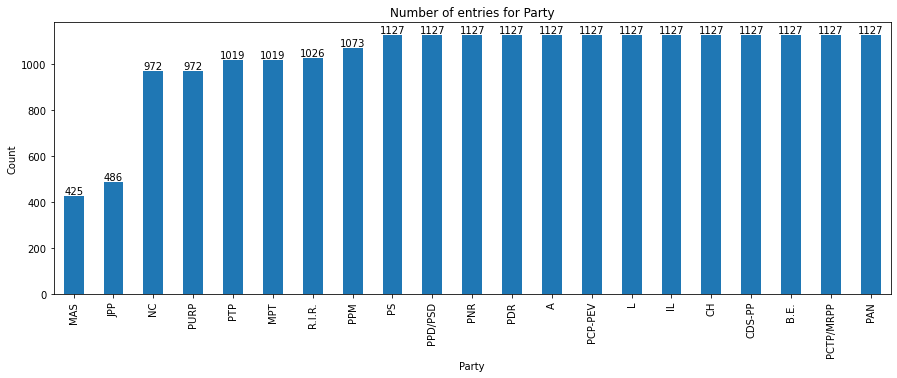

In [46]:
# territoryName analysis
plt.figure(figsize=(15,5))
ax = ucdata.groupby('Party').size().sort_values().plot(kind = 'bar', ylabel = 'Count', title = "Number of entries for Party")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>Above graph shows the count of data for 21 parties in Portugal. Count of values present for each party are different, since their share in each territory is different.

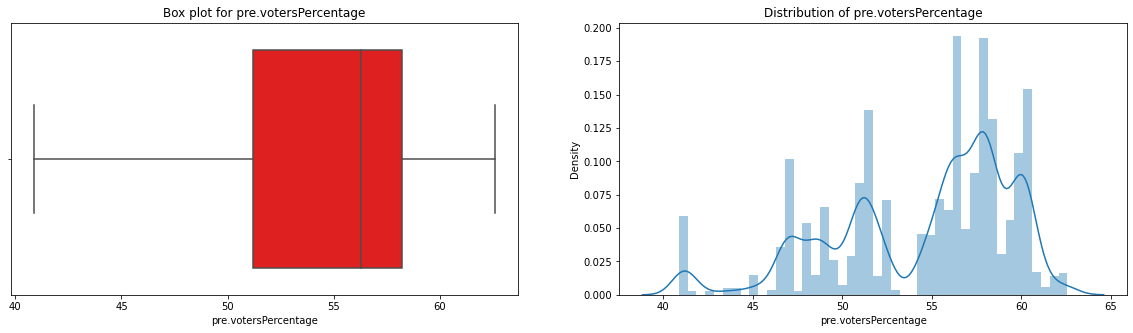

In [47]:
create_boxkde('pre.votersPercentage')

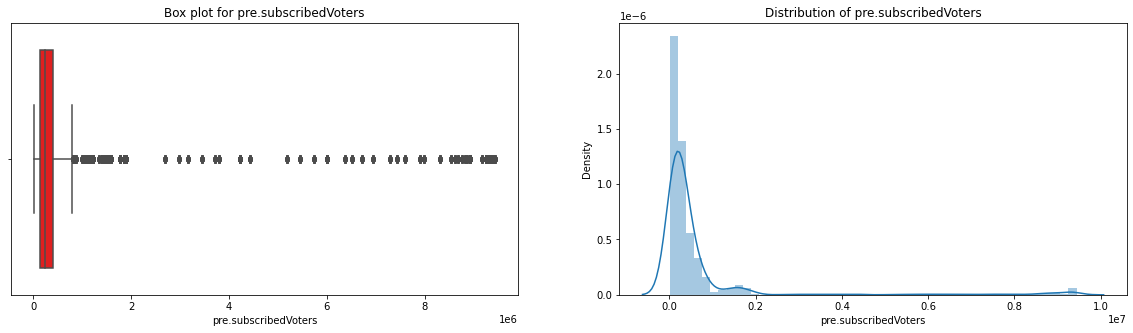

In [48]:
create_boxkde('pre.subscribedVoters')

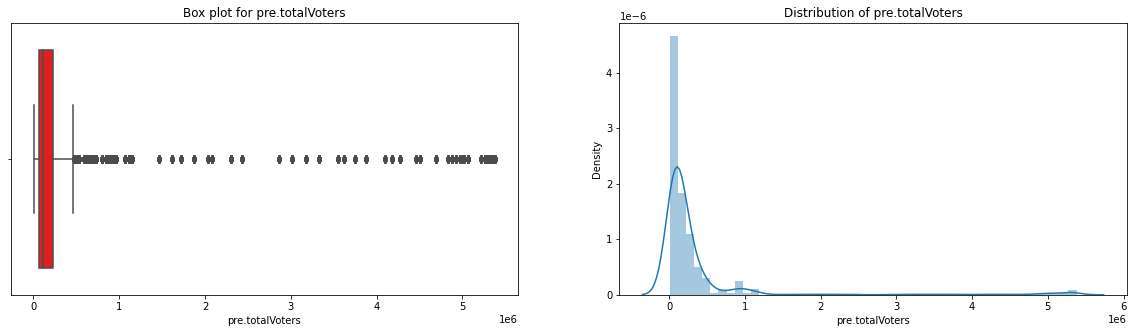

In [49]:
create_boxkde('pre.totalVoters')

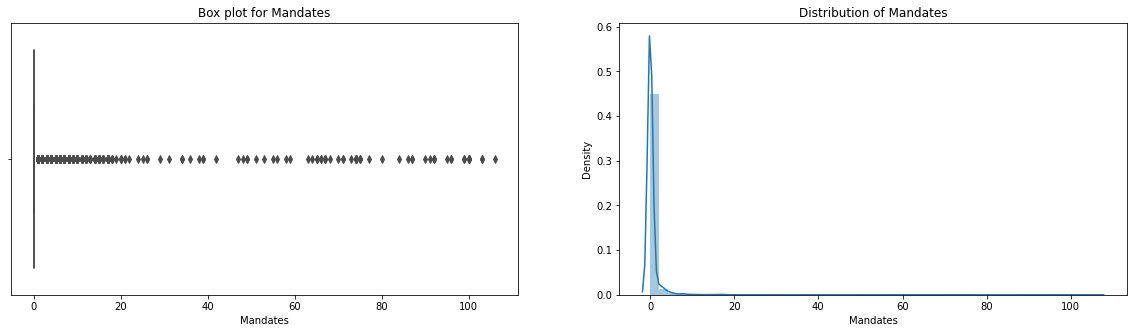

In [50]:
create_boxkde('Mandates')

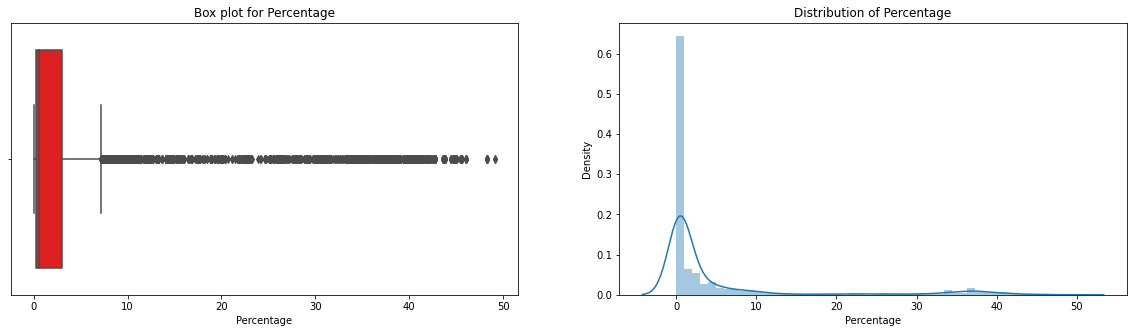

In [51]:
create_boxkde('Percentage')

#### **Findings:**
>Outliers can be observed from the above outputs<br>
>Out of 05 numerical columns only "pre.votersPercentage" column is not having any outlier value.

In [52]:
# Columns set 5
print(colset5)

['validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates']


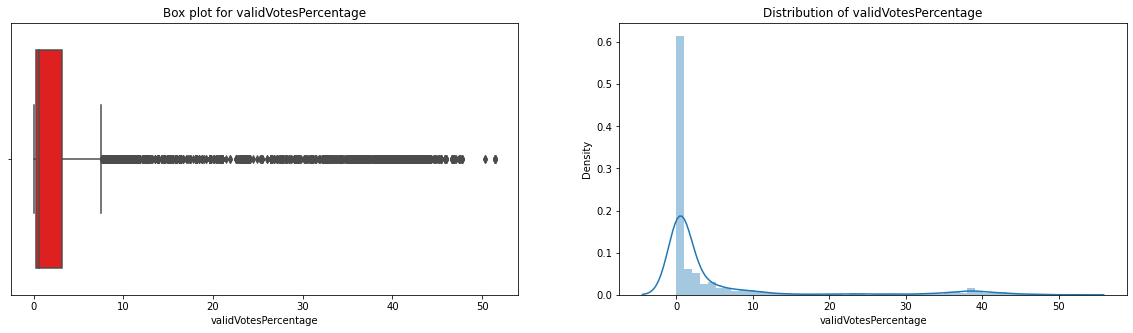

In [53]:
create_boxkde('validVotesPercentage')

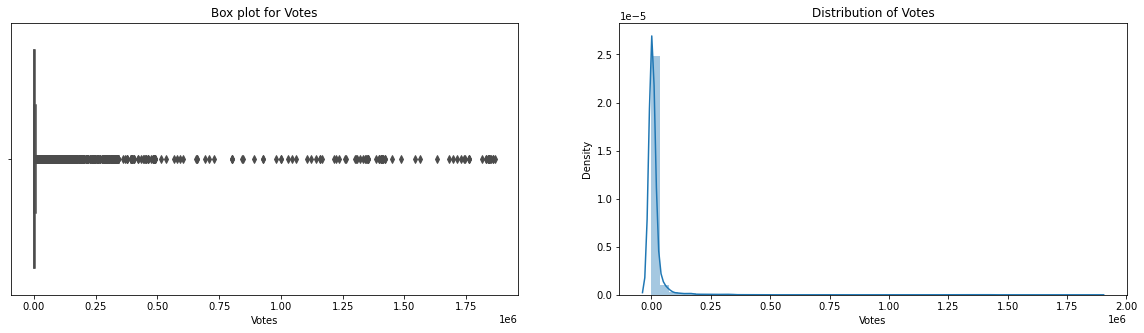

In [54]:
create_boxkde('Votes')

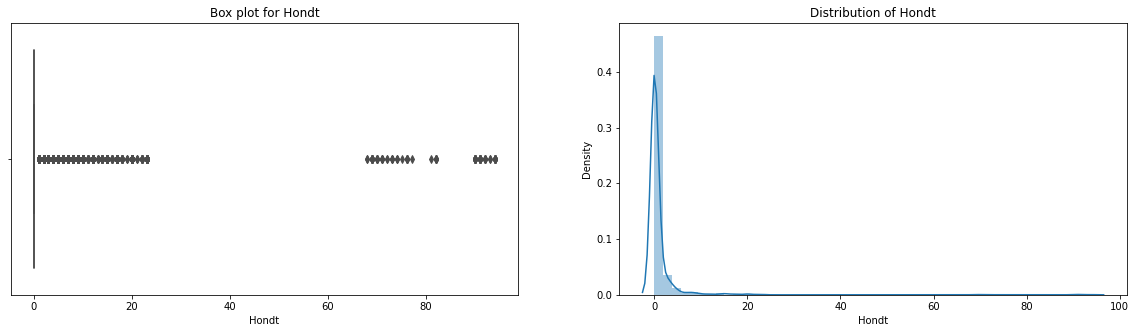

In [55]:
create_boxkde('Hondt')

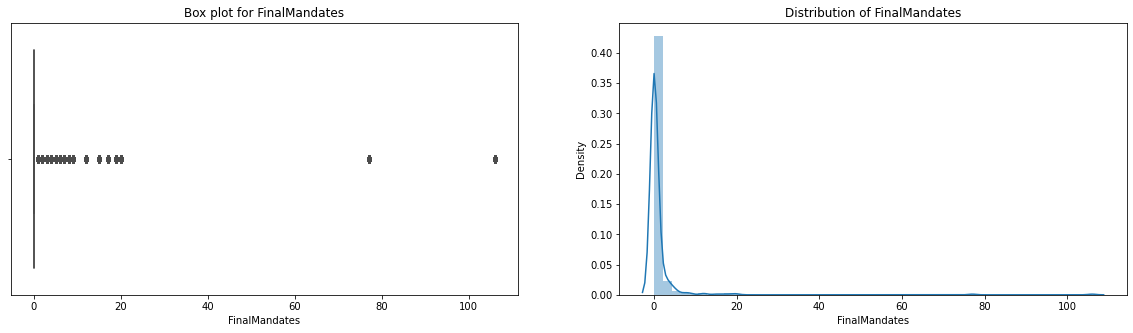

In [56]:
create_boxkde('FinalMandates')

#### **Findings:**
>From histogram we can identify Skewed distribution for validVotesPercentage, Votes, Hondt, FinalMandates
>From the box plot it is clear that Outliers are present. Can be ignored as they are specific to geography of portugal.

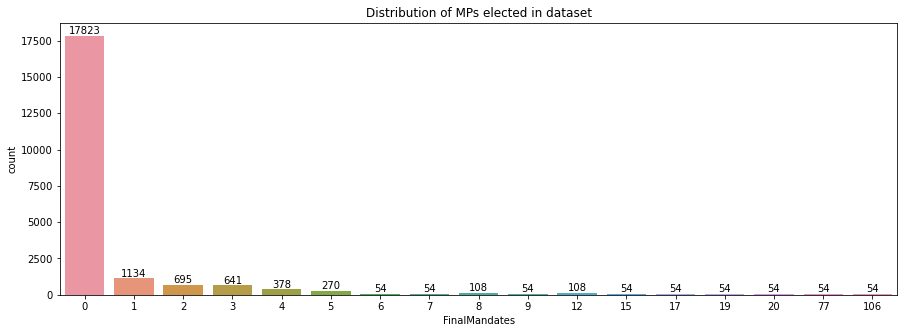

In [57]:
plt.figure(figsize = (15,5))
ax = sns.countplot(ucdata['FinalMandates'])
ax.bar_label(ax.containers[0])
plt.title("Distribution of MPs elected in dataset")
plt.show()

#### **Findings:**
>1. From the count plot it is clear that there are 17 unique values for FinalMandates.
2. Zero has the highest contribution, this may be due to minority parties in each territory, not winning a single seat in Parliament

<div class="alert alert-success"><b>6. Multivariate Analysis</b></div>

In [58]:
def plotregplot(feature, axis):
    sns.regplot(x = ucdata[feature], y = ucdata['FinalMandates'], line_kws= {'color':'r'}, ax=axis)
    axis.set_title('Relationship between '+ feature + ' and Final Mandates')

In [59]:
def draw_multi(columns, nrow, ncolumn, figuresize):
    fig, axes = plt.subplots(nrows = nrow, ncols = ncolumn, figsize = figuresize)
    for col, ax in zip(columns, axes.flat):
        plotregplot(col, ax)
    # disable leftover axes
    for ax in axes.flat[len(columns):]:
        ax.set_axis_off()
    plt.show()

In [60]:
# Column set 1
print(colset1)

['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes']


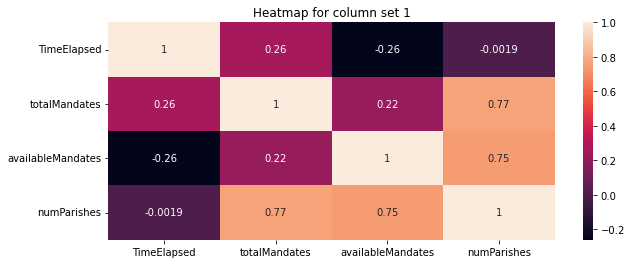

In [61]:
plt.figure(figsize=(10,4))
plt.title("Heatmap for column set 1")
sns.heatmap(ucdata[colset1].corr(), annot =True)
plt.show()

#### **Findings:**
>1. Slight multicollinearity between (totalMandates and numParishes), (availableMandates and numParishes)

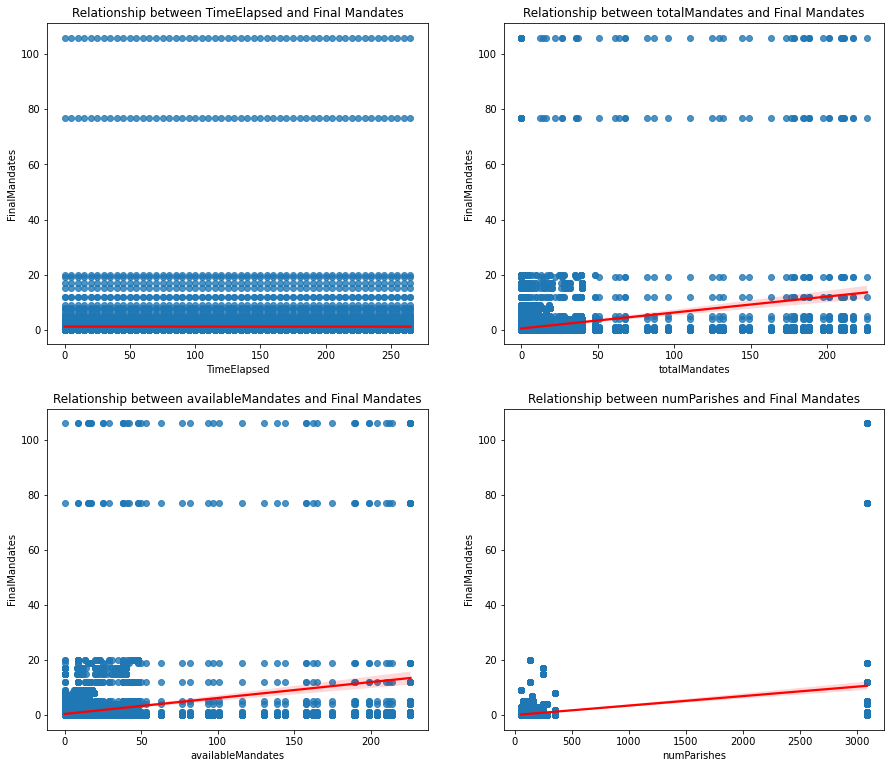

In [62]:
draw_multi(colset1[:1]+colset1[3:6], 2, 2, (15, 13))

#### **Findings:**
>1. Slight linear relationship between FinalMandates and 'totalMandates', 'availableMandates', 'numParishes'
2. FinalMadates is independent of TimeElapased

In [63]:
# Column set 2
print(colset2)

['numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage']


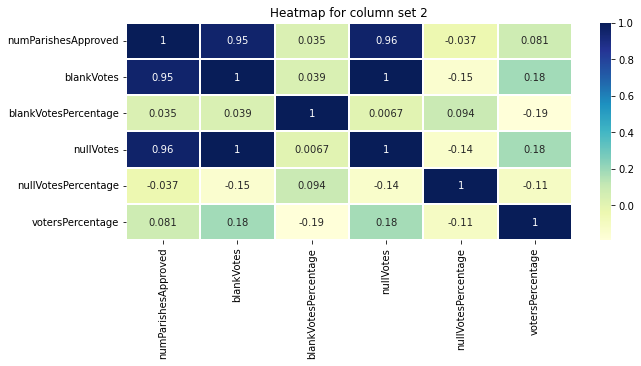

In [64]:
plt.figure(figsize=(10,4))
plt.title("Heatmap for column set 2")
sns.heatmap(ucdata[colset2].corr(), cmap="YlGnBu", annot =True, linewidth=0.2)
plt.show()

#### **Findings:**
>1. numParishesApproved, blankVotes & numParishesApproved and nullVotes are highly correlated to each other
2. Also nullvotes and blankvlotes are highly correlated to each other

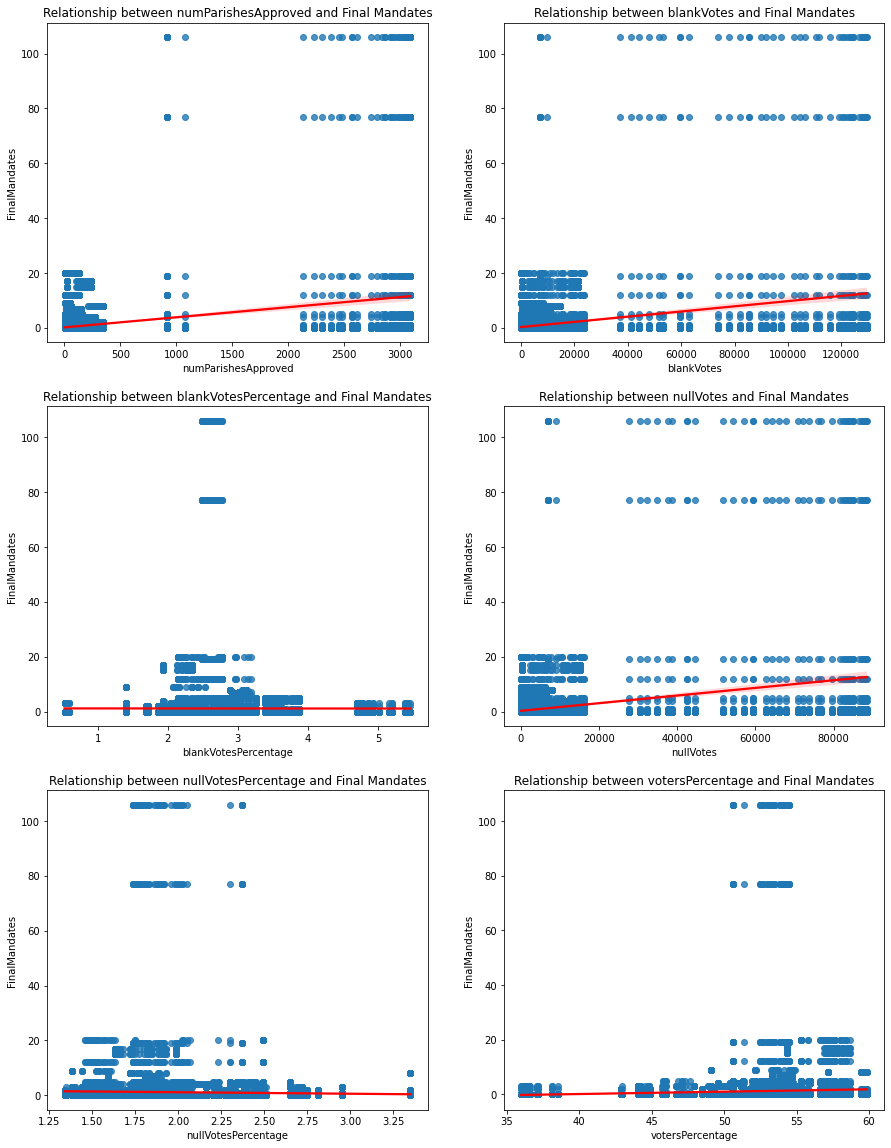

In [65]:
draw_multi(colset2, 3, 2, (15, 20))

#### **Findings:**
>1. Slight linear relationship exists between :<br>
        FinalMandates and 'numParishesApproved',
        FinalMandates and 'blankVotes',
        FinalMandates and 'nullVotes'
2. FinalMadates is independent of 'blankVotesPercentage', 'nullVotesPercentage' and 'votersPercentage'

In [66]:
# Column set 3
print(colset3)

['subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage']


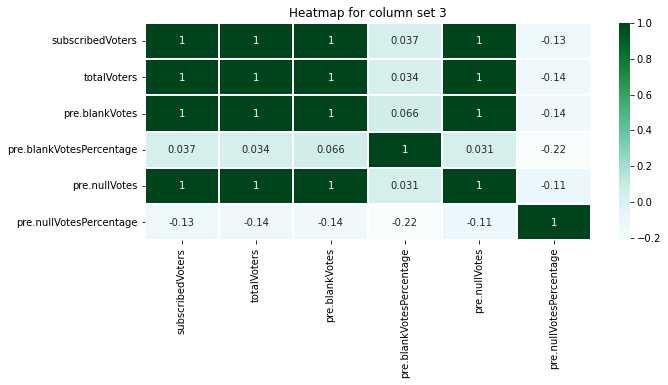

In [67]:
plt.figure(figsize=(10,4))
plt.title("Heatmap for column set 3")
sns.heatmap(ucdata[colset3].corr(), cmap="BuGn", annot =True, linewidth=0.2)
plt.show()

#### **Findings**
>1. pre.blankVotes And totalVoters are highly correlated.  
2. pre.blankVotes And subscribedVoters are highly correlated.
3. pre.nullVotes And totalVoters are highly correlated.                                                                         
4. pre.blankVotes And pre.nullVotes are highly correlated. 
5. subscribedVoters And totalVoters are highly correlated. 
6. subscribedVoters And pre.nullVotes are highly correlated.                                                                   
So we can drop columns from above highly correlated groups.

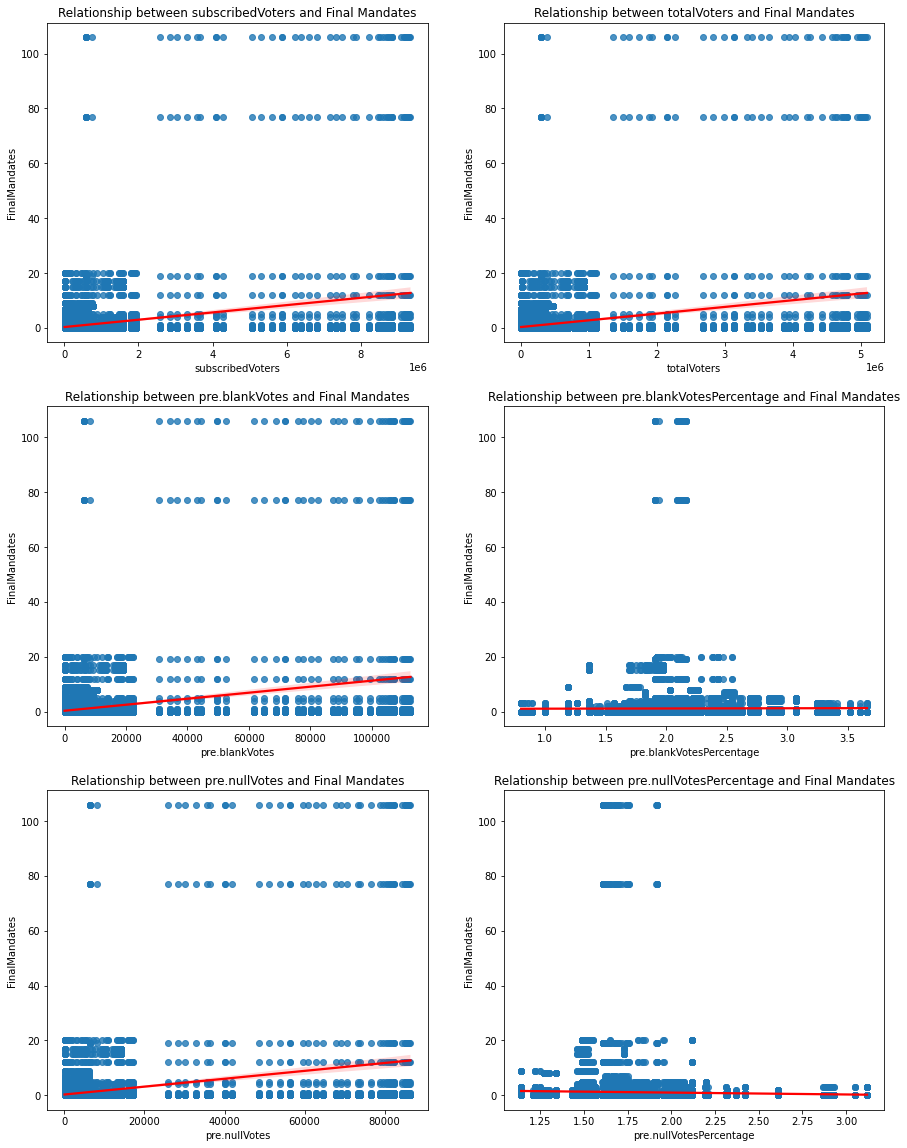

In [68]:
draw_multi(colset3, 3, 2, (15, 20))

#### **Findings:**
>1. Slight linear relationship exists between :<br>
        FinalMandates and 'subscribedVoters',
        FinalMandates and 'totalVoters',
        FinalMandates and 'pre.blankVotes',
        FinalMandates and 'pre.nullVotes'
2. FinalMadates is independent of 'pre.blankVotesPercentage', 'pre.nullVotesPercentage'.

In [89]:
# Column set 4
print(colset4)

['pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage']


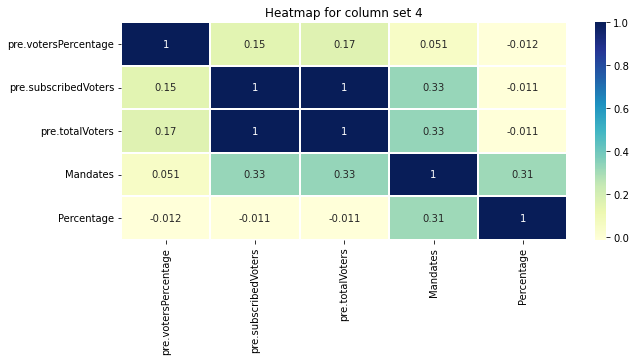

In [70]:
plt.figure(figsize=(10,4))
plt.title("Heatmap for column set 4")
sns.heatmap(ucdata[colset4].corr(), cmap="YlGnBu", annot =True, linewidth=0.2)
plt.show()

#### **Findings:**
>Multicolinearity exists between 'pre.subscribedVoters' and 'pre.totalVoters'

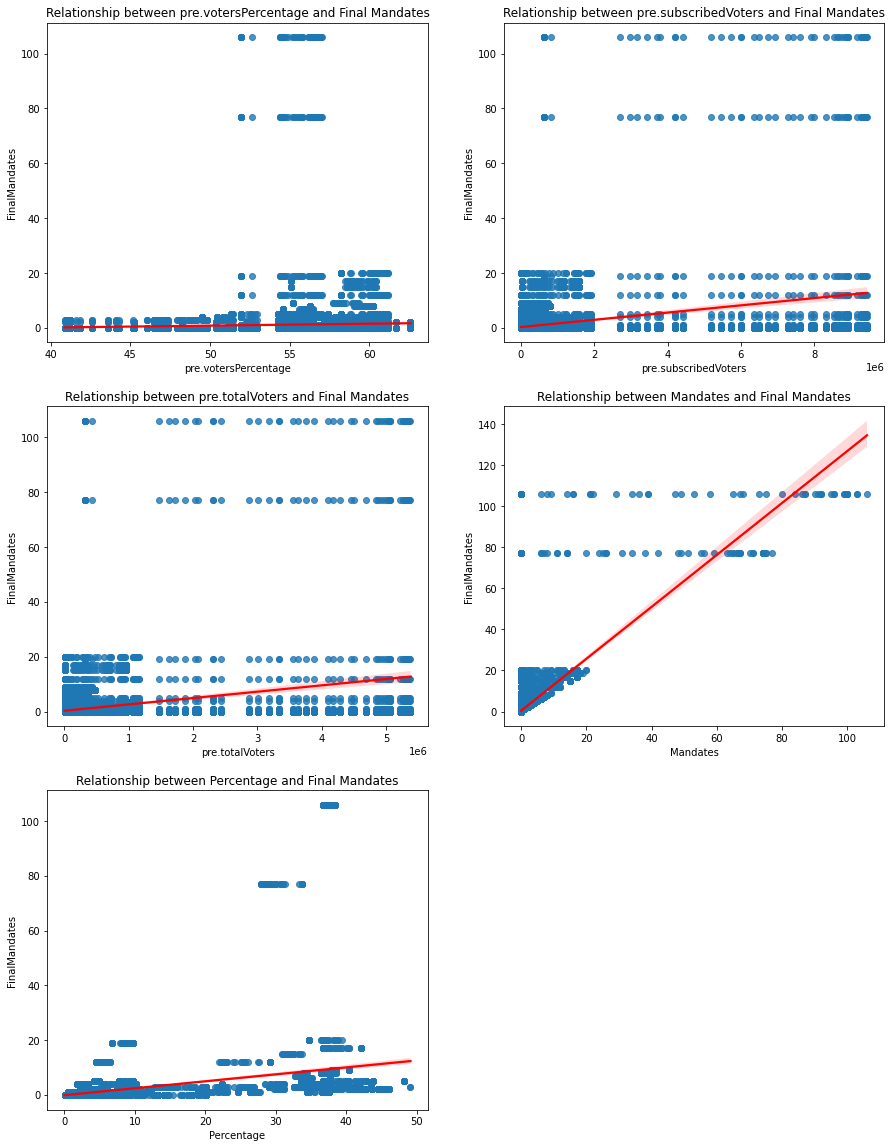

In [71]:
draw_multi(colset4[:3]+colset4[4:6], 3, 2, (15, 20))

#### **Findings:**
>1. High linear relationship between "Mandates" and "FinalMandates"
2. Slight linear relationship exists between :<br>
        FinalMandates and 'pre.subscribedVoters',
        FinalMandates and 'pre.totalVoters',
        FinalMandates and 'Percentage'
3. FinalMadates is independent of 'pre.votersPercentage'.

In [72]:
# Column set 5
print(colset5)

['validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates']


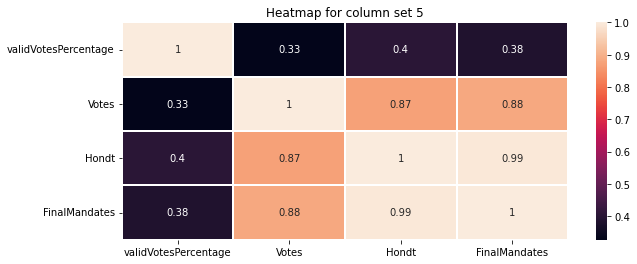

In [73]:
plt.figure(figsize=(10,4))
plt.title("Heatmap for column set 5")
sns.heatmap(ucdata[colset5].corr(), annot =True, linewidth=0.2)
plt.show()

#### **Findings:**
>1. Votes and Hondt are highly correlated with the target variable FinalMandates.
2. Multicolinearity exists between Votes and Hondt.

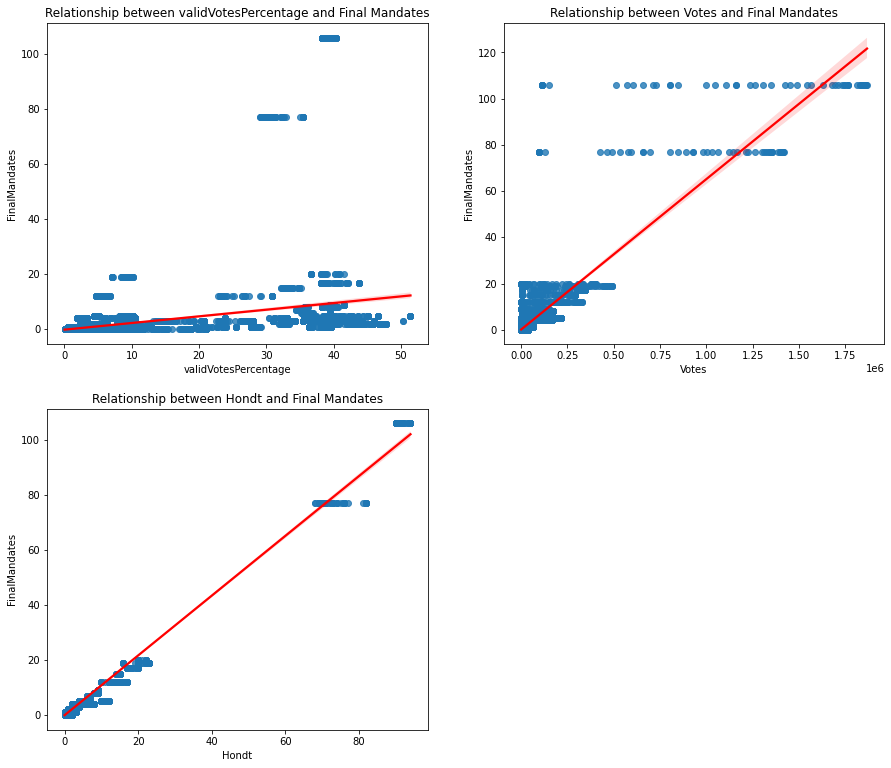

In [74]:
draw_multi(colset5[:-1], 2, 2, (15, 13))

#### **Findings:**
>1. Relationship between Hondt and FinalMandates is linear
2. Relationship between Votes and FinalMandates is linear
3. Relationship between ValidVotesPercentage and FinalMandates is somewhat linear

<div class="alert alert-success"><b>Q1 : What is the MP share for different parties in portugal?</b></div> 

In [32]:
mpshare = ucdata[ucdata['territoryName']=='Território Nacional'].groupby('Party')['FinalMandates'].unique().sort_values(ascending = False)

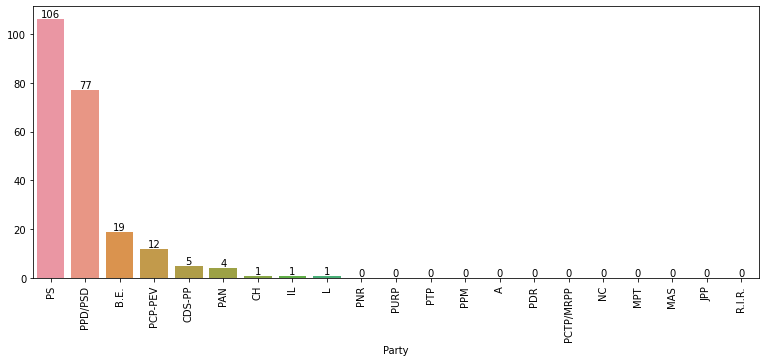

In [33]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(mpshare.index, [item[0] for item in mpshare])
ax.tick_params(axis = 'x', rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings**
>Only the following parties have MPs in portugal
>1. (Most):: PS, received highest vote share
2. (Has MP):: PPD/PSD, B.E., PCP-PEV, PAN, CH, IL, L

<div class="alert alert-success"><b>Q2 : What is presence of each party in Portugal?</b></div>

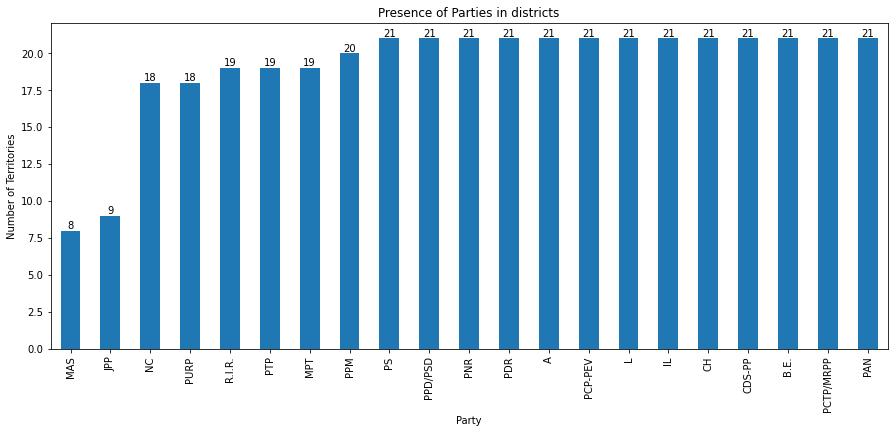

In [76]:
plt.figure(figsize=(15, 6))
ax = ucdata.groupby("Party")['territoryName'].nunique().sort_values().plot(
    kind="bar", ylabel="Number of Territories", title="Presence of Parties in districts")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>1. MAS and JPP party has the least presence in Portugal, with only 7 and 8 districts repectively (+1 including "Território Nacional", i.e. Portugal as whole)

<div class="alert alert-success"><b>Q3 : What is the count of territories in which parties own Zero MP?</b></div>

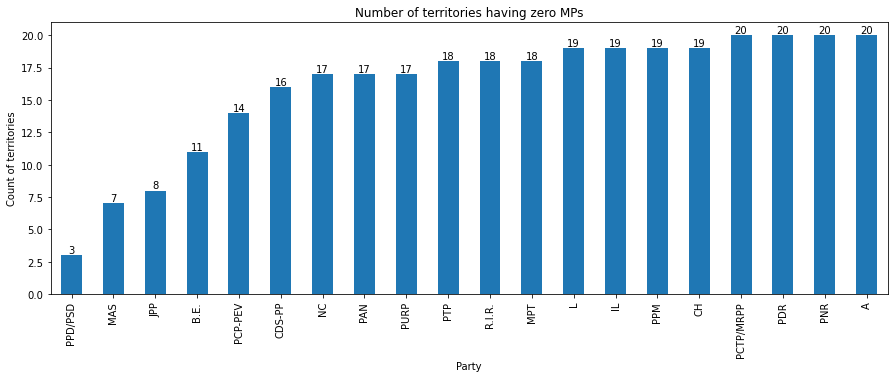

In [77]:
plt.figure(figsize=(15, 5))
ax = ucdata[(ucdata['FinalMandates'] == 0) & (ucdata['territoryName'] != 'Território Nacional')].groupby('Party')[
    'territoryName'].nunique().sort_values().plot(kind='bar', ylabel="Count of territories", title="Number of territories having zero MPs")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>1. PNR, A, PDR, PCTP/MRPP party has no MPs

<div class="alert alert-success"><b>Q4 : What are the number of parishes in each district?</b></div>

In [25]:
parish_list = ucdata.groupby('territoryName')['numParishes'].unique().sort_values()

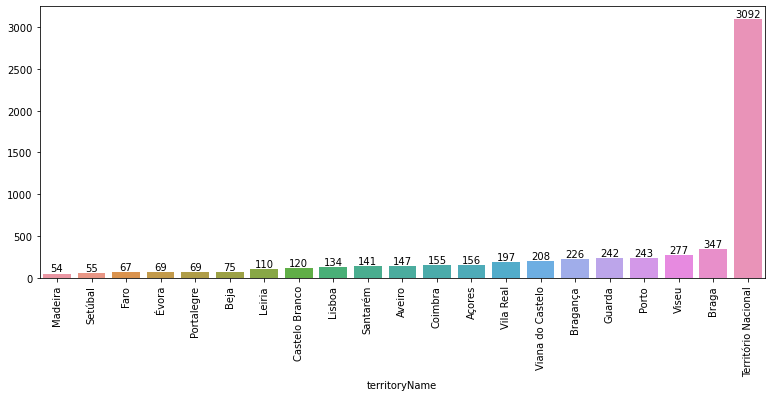

In [30]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(parish_list.index, [item[0] for item in parish_list])
ax.tick_params(axis = 'x', rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings**
>1. Braga has the most number of parishes, so this may be the most populous district in Portugal.
2. Portugal has 3092 parishes in total.

<div class="alert alert-success"><b>Q5 : What district has highest polling percentage?</b></div>

In [103]:
ucdata[ucdata['territoryName'] != 'Território Nacional'].groupby('territoryName')['votersPercentage'].max().idxmax()

'Braga'

#### **Findings**
>Braga has the highest polling percentage. This is expected as it has highest number of parishes.

<div class="alert alert-success"><b>Q6 : In which district highest number of people voted?</b></div>

In [59]:
ucdata[ucdata['territoryName'] != 'Território Nacional'].groupby('territoryName')['totalVoters'].max().idxmax()

'Lisboa'

#### **Findings**
>Interesting. Even though "Braga" recorded highest polling, it is "Lisbo", that has more number of voters.
* Seems like most people of Lisboa didn't vote.

<div class="alert alert-success"><b>Q7 : In which district highest number of people casted Null votes?</b></div>

In [60]:
ucdata[ucdata['territoryName'] != 'Território Nacional'].groupby('territoryName')['nullVotes'].max().idxmax()

'Lisboa'

#### **Findings**
>Interesting. Some many people of "Lisbo" made mistakes in the ballet paper.

<div class="alert alert-success"><b>Q8 : In which district highest number of people casted blank votes?</b></div>

In [61]:
ucdata[ucdata['territoryName'] != 'Território Nacional'].groupby('territoryName')['blankVotes'].max().idxmax()

'Lisboa'

#### **Findings**
>Interesting. People of "Lisbo" doesn't like most candidates.

<div class="alert alert-success"><b>Q9 : In which district highest number of people casted blank votes in previous election?</b></div>

In [104]:
ucdata[ucdata['territoryName'] != 'Território Nacional'].groupby('territoryName')['pre.blankVotes'].max().idxmax()

'Lisboa'

#### **Findings**
>Interesting. In previous election as well, Lisboa has highest number of blank votes.<br>Parties need to analyse further on this cause.